<a href="https://colab.research.google.com/github/leoli24/BMEN35/blob/main/Session4/BMEN35_Ex12_neural_netorks_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
## Leo Li, BME5

## Your mission is now the following:

You will use a dataset from OpenML (https://www.openml.org/). If you look at their webpage there are a lot of dataset that you can use. In this assignment you will use the SPECTF dataset from OpemML. (More info on this dataset can be found here: https://www.openml.org/search?type=data&sort=runs&id=337&status=active and here https://archive.ics.uci.edu/ml/datasets/SPECTF+Heart) and the original paper (https://doi.org/10.1016/S0933-3657(01)00082-3 )

You should do the following

1.   Fetch the dataset from OpenML (data_id is 337)
2.   Train a neural network (using sklearns MLPClassifier) with two hidden layers. You can try with diffrent number of neurons in the hidden layers. (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
3.   Find the accuracy, f1-score, precision, recall for the classifier
4.   Plot the ROC-curve





Some tips/hints:
*   There is a nice little api from sklearn to fetch dataset from OpenML. (fetch_openml). Easiest way to get the data is to use its id.
*   Once you get your data fetched from openML you can use data.data for your data/features and data.target for your targets/classes
*   There is some trickery to get the imported data to a numpy array
    I would use something like: `x = data.data.to_numpy()`  and` y = data.target.to_numpy()` and furtermore y is an array of string and we want it to be integers so we can change that with `y = y.astype(int)`
*   A good number of neurons for the hidden layers are in the double digits.
*   sklearn.metrics has built-in functionality to get the "metrics" you need (accuracy, f1-score, precision, recall and ROC-curve)



We will start you off with some imports and you will fill in the rest.


## When you have finished this assignment , save this notebook and submit it as assignment 4

In [10]:
from sklearn.datasets import fetch_openml 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
import pandas as pd

## load data
id = 337
data = fetch_openml(data_id = id)
X = data.data.to_numpy()
y = data.target.to_numpy()
y = y.astype(int)



In [11]:
## split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=1)
clf = MLPClassifier(hidden_layer_sizes = (2,50)).fit(X_test,y_test)

y_hat = clf.predict(X_test) #Prediction

#Metrics
print("Accuracy: ", clf.score(X_test, y_test))
print("Precision: ", precision_score(y_test, y_hat, average = None))
print("Recall: ", recall_score(y_test, y_hat, average = None))
print("F1 score: ",f1_score(y_test, y_hat, average = None))

Accuracy:  0.7272727272727273
Precision:  [0.         0.72727273]
Recall:  [0. 1.]
F1 score:  [0.         0.84210526]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


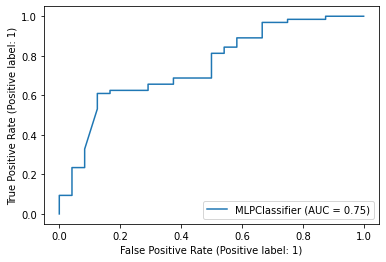

In [14]:
## ROC
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()